<a href="https://colab.research.google.com/github/zack-murray/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
import pandas as pd
import numpy as np 

df = pd.read_csv('/content/top10s.csv')

In [2]:
df = df.drop(['Unnamed: 0'],axis=1)
df.describe(include='all')

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603,603,603,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
unique,584,184,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,First Time,Katy Perry,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,17,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2014.592040,118.500829,70.538972,64.485904,-5.495854,17.782753,52.212272,225.404643,14.490879,8.358209,67.363184
std,NaN,NaN,NaN,2.607057,24.107068,16.142114,13.168133,1.710210,13.082827,22.514035,38.943380,20.945218,7.443545,12.513080
min,NaN,NaN,NaN,2010.000000,43.000000,4.000000,23.000000,-15.000000,2.000000,4.000000,134.000000,0.000000,3.000000,18.000000
25%,NaN,NaN,NaN,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.500000
50%,NaN,NaN,NaN,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,NaN,NaN,NaN,2017.000000,128.500000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000


In [0]:
df.rename(columns = {'top genre': 'top_genre', 'bpm': 'beats_per_minute', 'nrgy': 'energy', 
                       'dnce': 'danceability', 'dB': 'loudness(dB)', 'live': 'liveness', 
                       'val': 'valence', 'dur': 'length', 'acous': 'acousticness', 
                       'spch': 'speechiness', 'pop': 'popularity'}, inplace=True)

In [4]:
df.head()

,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness(dB),liveness,valence,length,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78




---

###Choose your target. Which column in your tabular dataset will you predict?

---



In [0]:
target = 'popularity'

---
###Is your problem regression or classification?
---

In [0]:
# Regression, since we're dealing with a continuous output variable



---

###How is your target distributed?
Classification: How many classes? Are the classes imbalanced?

Regression: Is the target right-skewed? If so, you may want to log transform the target.

---



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


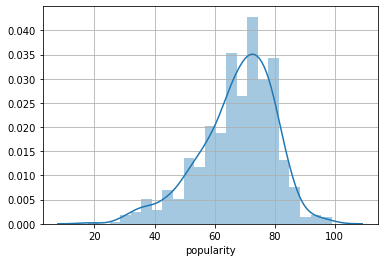

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.distplot(df['popularity'])
ax.grid()
plt.show()

In [0]:
# The target is left-skewed, makes sense as it's a collection of the most popular songs



---

###Choose your evaluation metric(s).

Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?

Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

---



In [0]:
# Depends on the model I end up using. I'll probably try both MAE and RMSE and compare my results to make my decision.
# I've read that MAE is more difficult training with gradient descent based procedures, so i'll keep that in mind.



---

###Choose which observations you will use to train, validate, and test your model.
Are some observations outliers? Will you exclude them?
Will you do a random split or a time-based split?

---



In [0]:
# I don't have an exhaustive amount of observations, so i'll likely include them all. 
# They're all valuable and there are not outliers so I feel they should be included.
# Since the data spans the last 10 years, i'll be doing a time-based split. 



---

###Begin to clean and explore your data.

---



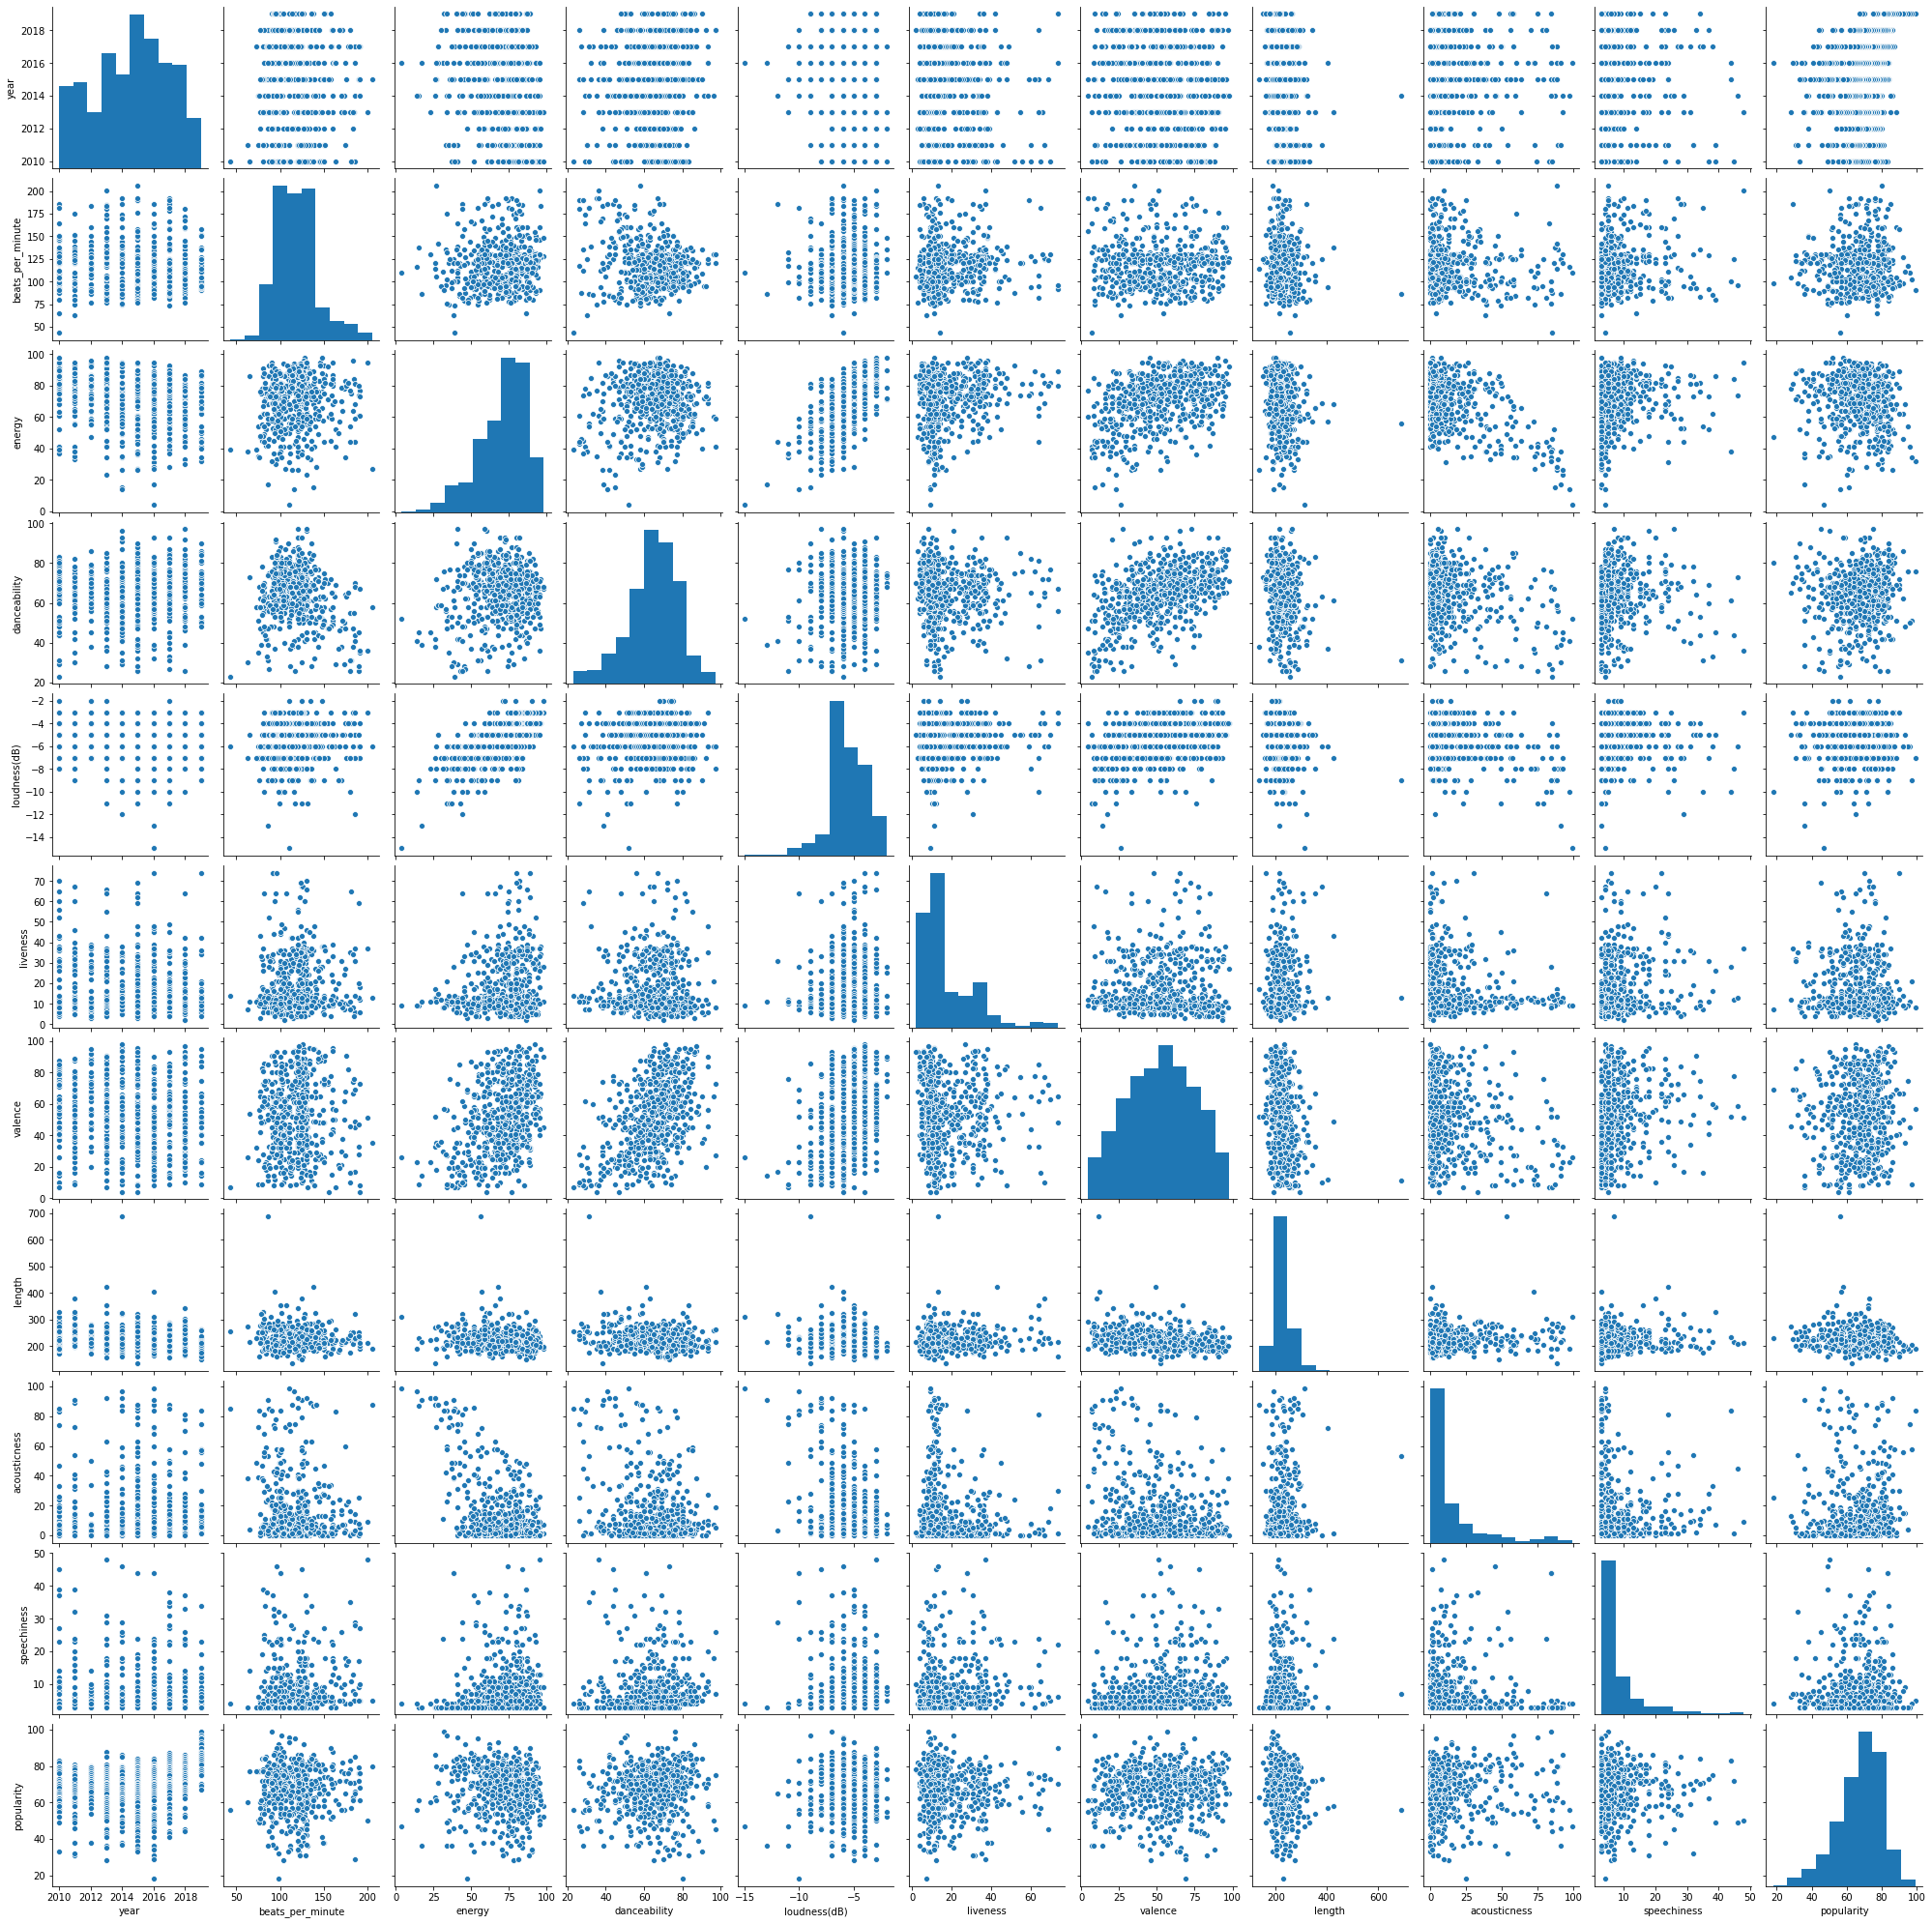

In [7]:
sns.pairplot(df)
plt.show()

In [10]:
df[df['popularity'] <= 40]

,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness(dB),liveness,valence,length,acousticness,speechiness,popularity
49,Break Your Heart,Taio Cruz,dance pop,2010,122,90,67,-5,8,63,186,0,3,33
97,Super Bass,Nicki Minaj,dance pop,2011,127,74,77,-7,40,59,201,6,23,38
98,Raise Your Glass,P!nk,dance pop,2011,122,64,68,-7,12,56,208,0,12,38
99,Invading My Mind,Jennifer Lopez,dance pop,2011,129,88,73,-4,32,69,201,2,7,31
103,Muny - Album Version (Edited),Nicki Minaj,dance pop,2011,98,73,78,-5,35,53,227,54,32,32
137,It Will Rain,Bruno Mars,pop,2012,150,84,58,-7,8,48,258,34,5,38
207,Foolish Games,Jewel,alaska indie,2013,132,34,51,-11,12,7,250,23,3,36
208,Outta Nowhere (feat. Danny Mercer),Pitbull,dance pop,2013,95,84,71,-4,21,66,207,16,3,35
209,Freak,Kelly Rowland,atl hip hop,2013,104,78,65,-5,12,46,274,13,6,28
262,You're Mine (Eternal),Mariah Carey,dance pop,2014,149,58,63,-7,38,56,224,28,7,38


In [0]:
# Found outliers with 0 - really low popularity score despite being top 50 songs
# Editted correct information into the dataset to fix the metrics



---

### Begin to choose which features, if any, to exclude. Would some features "leak" future information?

---



In [0]:
# I don't have enough features to exclude any, they don't overlap and I believe they'll all benefit my model
# Except the categorical columns, I won't use title or artist when making my prediction